In [38]:
import pandas as pd
from palmerpenguins import load_penguins
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error


from plotnine import ggplot, aes, geom_point, geom_line, geom_smooth

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [21]:
from palmerpenguins import load_penguins

penguins = load_penguins()

print(penguins.head())


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  


In [75]:
penguins = penguins.dropna()
X = penguins.drop('bill_depth_mm', axis = 1)
y = penguins['bill_depth_mm']
X_train, X_test, y_train, y_test = train_test_split(X,y)

## Preprocessing One-hot-encode
## Model spec: Linear Regression

# define the dunctions into a shorter term
lr = LinearRegression()
enc = OneHotEncoder()

# Creating a column transformer to specify which column to dummify
ct = ColumnTransformer(
    [('dummify_s', enc, ['species']),
    ('dummify_i', enc, ['island']),
    ('dummify_se', enc, ['sex'])]
)

# Creating a pipeline that the data will go through, first column transformer, then linear regression
my_pipeline = Pipeline(
    [('dummify_everything', ct), ('ols', lr)]

)


fitted_pipeline1 = my_pipeline.fit(X_train, y_train)
predict1 = fitted_pipeline1.predict(X_test)

X_test['predict'] = predict1
X_test1 = X_test

MSE1 = mean_squared_error(y_test, predict1)

print(MSE1)

predict11 = fitted_pipeline1.predict(X_train)

X_train['predict'] = predict11
X_train1 = X_train

MSE11 = mean_squared_error(y_train, predict11)

print(MSE11)

0.7935376469198158
0.6496427050401302


In [74]:
penguins = penguins.dropna()
X = penguins.drop('bill_depth_mm', axis = 1)
X = X.drop('species', axis = 1)
y = penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X,y)

## Preprocessing One-hot-encode
## Model spec: Linear Regression

# define the dunctions into a shorter term
lr = LinearRegression()
enc = OneHotEncoder()

# Creating a column transformer to specify which column to dummify
ct = ColumnTransformer(
    [('dummify_i', enc, ['island']),
    ('dummify_se', enc, ['sex'])]
)

# Creating a pipeline that the data will go through, first column transformer, then linear regression
my_pipeline = Pipeline(
    [('dummify_everything', ct), ('ols', lr)]

)


fitted_pipeline2 = my_pipeline.fit(X_train, y_train)
predict2 = fitted_pipeline2.predict(X_test)

X_test['predict'] = predict2
X_test2 = X_test

MSE2 = mean_squared_error(y_test, predict2)

print(MSE2)

predict21 = fitted_pipeline2.predict(X_train)

X_train['predict'] = predict21
X_train2 = X_train

MSE21 = mean_squared_error(y_train, predict21)

print(MSE21)

1.6222655257590535
1.8540224579849935


In [73]:
penguins = penguins.dropna()
X = penguins.drop('bill_depth_mm', axis = 1)
X = X.drop('species', axis = 1)
X = X.drop('island', axis = 1)
y = penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X,y)

## Preprocessing One-hot-encode
## Model spec: Linear Regression

# define the dunctions into a shorter term
lr = LinearRegression()
enc = OneHotEncoder()

# Creating a column transformer to specify which column to dummify
ct = ColumnTransformer(
    [('dummify_se', enc, ['sex'])]
)

# Creating a pipeline that the data will go through, first column transformer, then linear regression
my_pipeline = Pipeline(
    [('dummify_everything', ct), ('ols', lr)]

)


fitted_pipeline3 = my_pipeline.fit(X_train, y_train)
predict3 = fitted_pipeline3.predict(X_test)

X_test['predict'] = predict3
X_test3 = X_test

MSE3 = mean_squared_error(y_test, predict3)

print(MSE3)

predict31 = fitted_pipeline3.predict(X_train)

X_train['predict'] = predict31
X_train3 = X_train

MSE31 = mean_squared_error(y_train, predict31)

print(MSE31)

3.4151344694682613
3.3056049693278613


In [82]:
penguins = penguins.dropna()
X = penguins.drop('bill_depth_mm', axis = 1)
X = X.drop('species', axis = 1)
X = X.drop('island', axis = 1)
X = X.drop('sex', axis = 1)
y = penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X,y)

## Preprocessing One-hot-encode
## Model spec: Linear Regression

# define the dunctions into a shorter term
lr = LinearRegression()
enc = OneHotEncoder()


# Creating a pipeline that the data will go through, first column transformer, then linear regression
my_pipeline = Pipeline(
    [('ols', lr)]

)


fitted_pipeline4 = my_pipeline.fit(X_train, y_train)
predict4 = fitted_pipeline4.predict(X_test)

X_test['predict'] = predict4
X_test4 = X_test

MSE4 = mean_squared_error(y_test, predict4)

print(MSE4)

predict41 = fitted_pipeline4.predict(X_train)

X_train['predict'] = predict41
X_train4 = X_train

MSE41 = mean_squared_error(y_train, predict41)

print(MSE41)

2.375286813921988
2.4189171882065312


In [77]:
data = { 'MSE': [MSE4, MSE3, MSE2, MSE1], 'VAR': [4, 6, 9, 12], 'MSE2': [MSE41,MSE31,MSE21,MSE11]}

df = pd.DataFrame(data)

print(df)

        MSE  VAR      MSE2
0  2.167349    4  2.492145
1  3.415134    6  3.305605
2  1.622266    9  1.854022
3  0.793538   12  0.649643


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

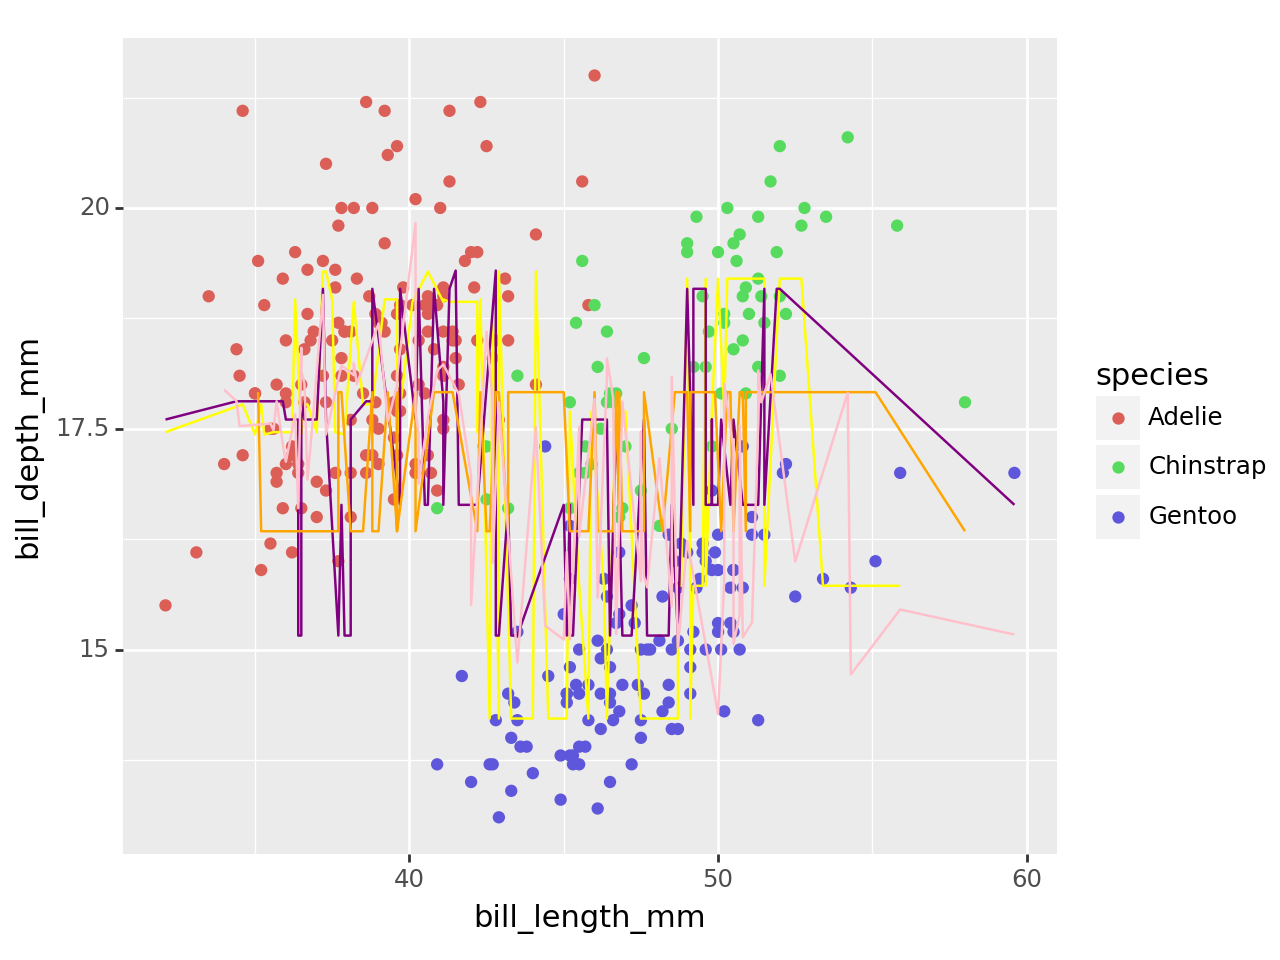

<Figure Size: (640 x 480)>

In [78]:
(ggplot(penguins)
    + aes(y='bill_depth_mm', x='bill_length_mm', color = 'species')
    + geom_point()
    + geom_line(X_test1, aes(x = 'bill_length_mm', y='predict'), color = 'yellow')
    + geom_line(X_test2, aes(x = 'bill_length_mm', y='predict'), color = 'purple')
    + geom_line(X_test3, aes(x = 'bill_length_mm', y='predict'), color = 'orange')
    + geom_line(X_test4, aes(x = 'bill_length_mm', y='predict'), color = 'pink')
)

C:\Users\tuke-\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\tuke-\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


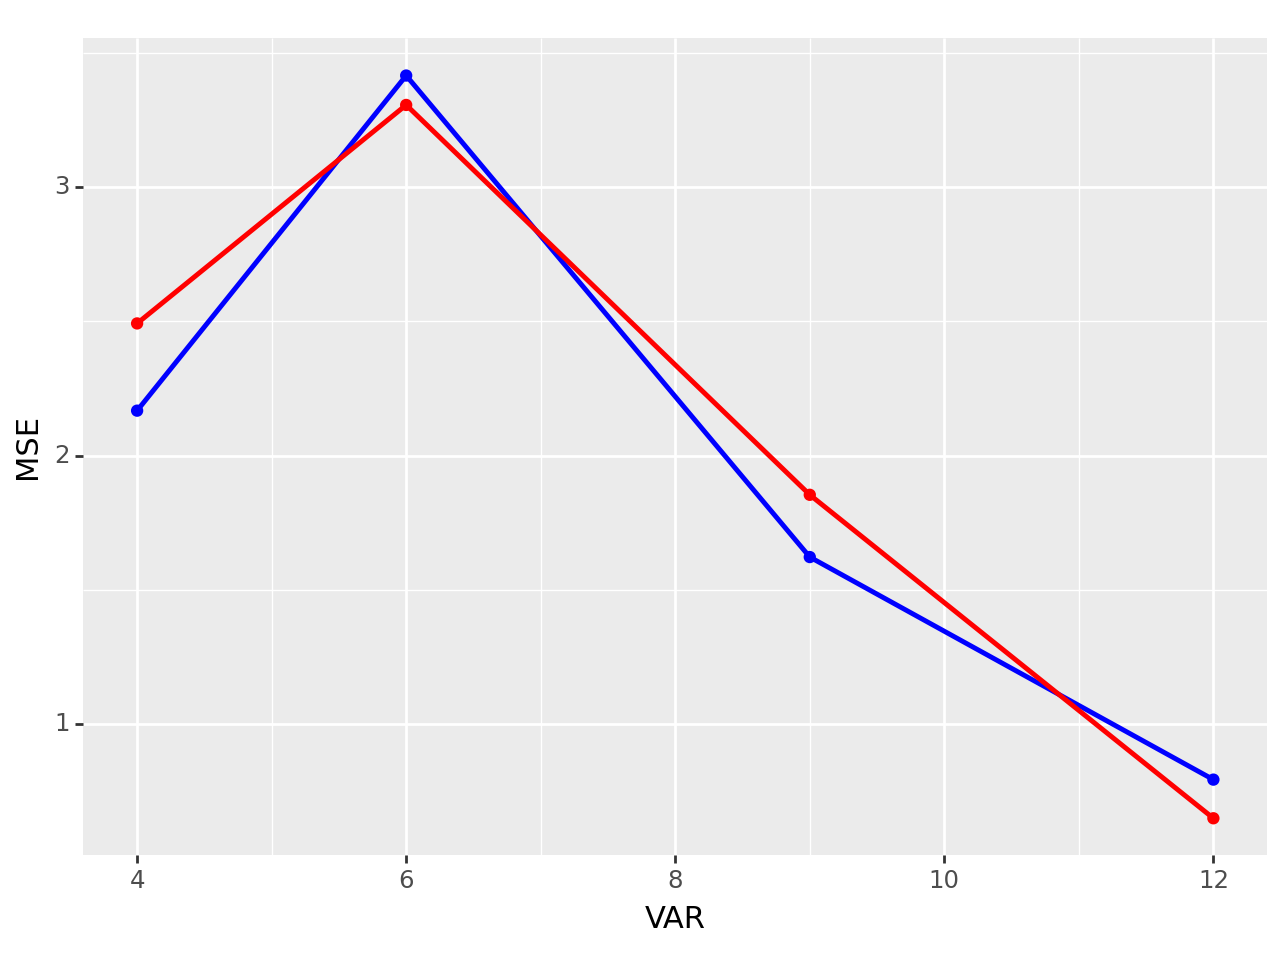

<Figure Size: (640 x 480)>

In [81]:
(ggplot(df)
    + geom_point(aes(y='MSE', x='VAR'), color = 'blue')
    + geom_smooth(aes(y='MSE', x='VAR'), color = 'blue')
    + geom_point(aes(y='MSE2', x='VAR'), color = 'red')
    + geom_smooth(aes(y='MSE2', x='VAR'), color = 'red')
)

Based on this comparison, the training and test data both performed very similarly in therms of MSE and we can see that the MSE will be better the more variables we use in this case. The model with 12 predictor variables gave us an MSE below 1. It is interesting to note that having Sex as the only categorical variable actually made the model perform worse with the highest MSE.